## This notebook illustrates how to run dive using a Gaussian model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pymc3 as pm
import math as m
import arviz as az
import matplotlib.pyplot as plt

In [3]:
import dive

In [4]:
Filename = '../data/3992_good.dat'
t, Vdata = dive.loadTrace(Filename)

## Using a single Gaussian in the model

In [7]:
nGauss = 1 # number of Gaussians 
model = dive.multigaussmodel(nGauss,t,Vdata)

d:\research\projects\software\bayes\dive\dive\utils.py:52: RuntimeWarning: invalid value encountered in true_divide
  K[:,ir] = (np.cos(ph)*C+np.sin(ph)*S)/kappa


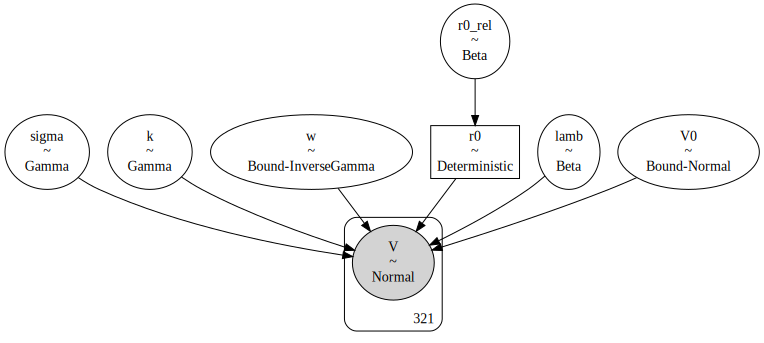

In [8]:
pm.model_to_graphviz(model)

In [11]:
MCMCparameters = {'draws':5000, 'chains':2, 'tune':1000, 'cores': 2}
df = dive.sample(model,MCMCparameters)

d:\research\projects\software\bayes\dive\dive\utils.py:92: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(model=Model, draws=MCMCparameters["draws"], tune=MCMCparameters["tune"], chains=MCMCparameters["chains"],cores=MCMCparameters["cores"])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 76 seconds.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  3.918  0.010   3.900    3.937        0.0      0.0    6738.0    7065.0   
w[0]   0.588  0.026   0.540    0.637        0.0      0.0    6526.0    6701.0   
k      0.050  0.003   0.044    0.055        0.0      0.0    6535.0    6012.0   
λ      0.499  0.004   0.492    0.506        0.0      0.0    5660.0    5864.0   
V₀     0.970  0.005   0.960    0.980        0.0      0.0    6109.0    6812.0   
σ      0.020  0.001   0.019    0.022        0.0      0.0    8743.0    6710.0   

       r_hat  
r0[0]    1.0  
w[0]     1.0  
k        1.0  
λ        1.0  
V₀       1.0  
σ        1.0

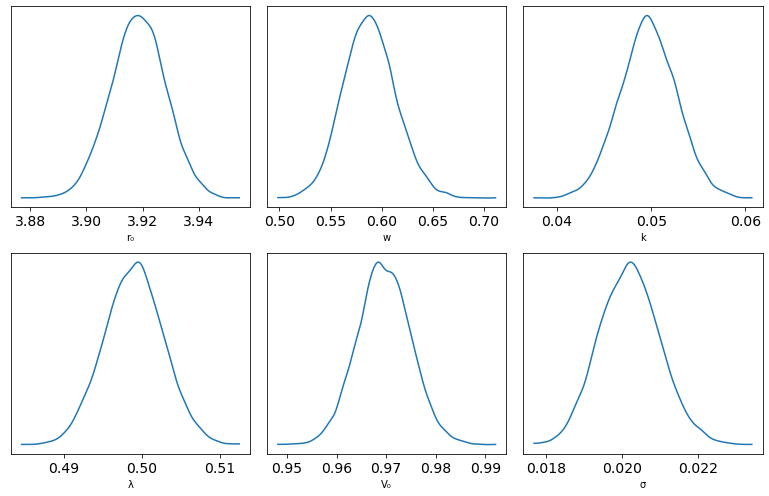

d:\research\projects\software\bayes\dive\dive\utils.py:52: RuntimeWarning: invalid value encountered in true_divide
  if kappa != 0:


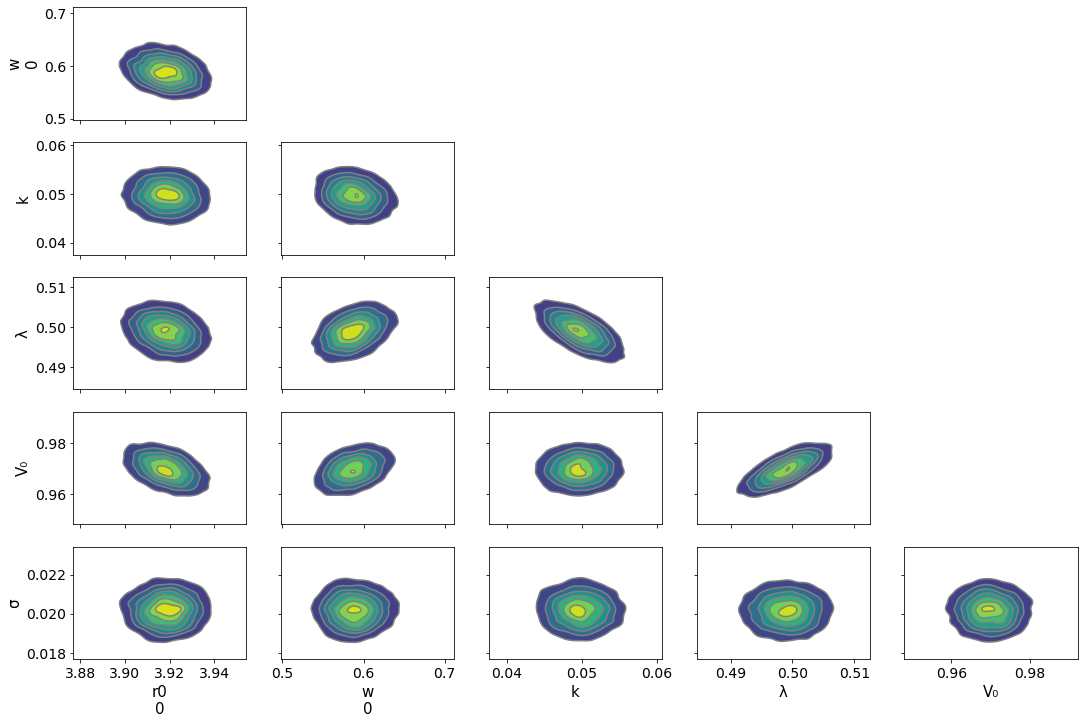

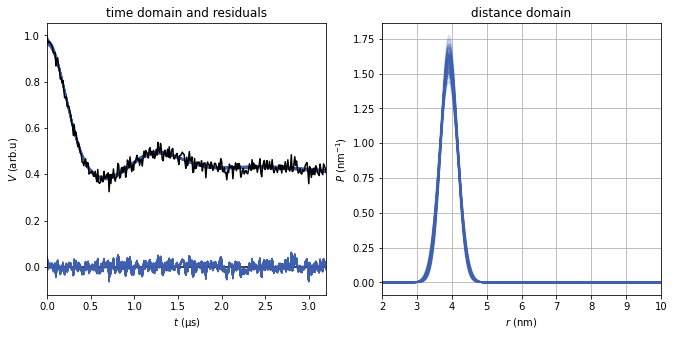

In [17]:
dive.summary(df,model,Vdata,t,r)

d:\research\projects\software\bayes\dive\dive\utils.py:52: RuntimeWarning: invalid value encountered in true_divide
  if kappa != 0:


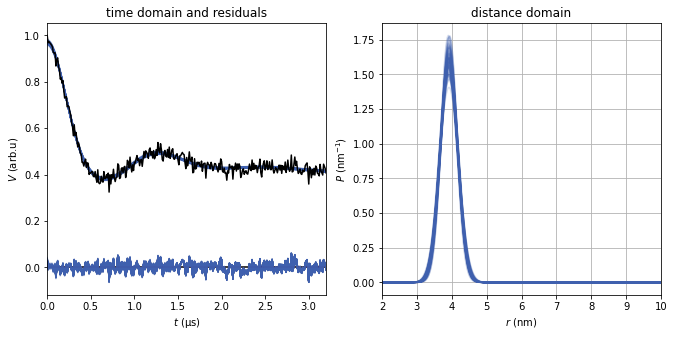

In [14]:
r = np.linspace(2, 10,num = 300)
Ps, Vs, _, _ = dive.drawPosteriorSamples(df,r,t)
dive.plotMCMC(Ps,Vs,Vdata,t,r)

## Using two Gaussians

d:\research\projects\software\bayes\dive\dive\utils.py:52: RuntimeWarning: invalid value encountered in true_divide
  K[:,ir] = (np.cos(ph)*C+np.sin(ph)*S)/kappa


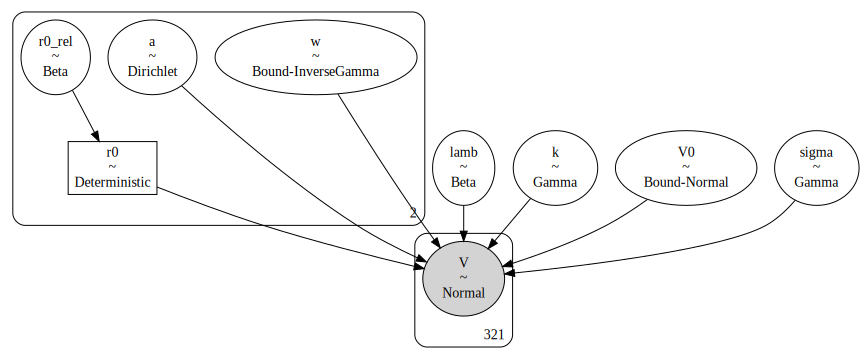

In [5]:
nGauss = 2 # number of Gaussians 
model2 = dive.multigaussmodel(nGauss,t,Vdata)
pm.model_to_graphviz(model2)

In [6]:
MCMCparameters = {'draws':1000, 'chains':2, 'tune':100, 'cores': 1}
df2 = dive.sample(model2,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\aesara\graph\fg.py:525: UserWarning: Variable argmax cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\aesara\graph\fg.py:525: UserWarning: Variable Elemwise{add,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\aesara\graph\fg.py:525: UserWarning: Variable Elemwise{mul,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\aesara\graph\fg.py:525: UserWarning: Variable Elemwise{mul}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, V0, lamb, k, a, w, r0_rel]


In [ ]:
dive.summary(df2,model2,Vdata,t,r)

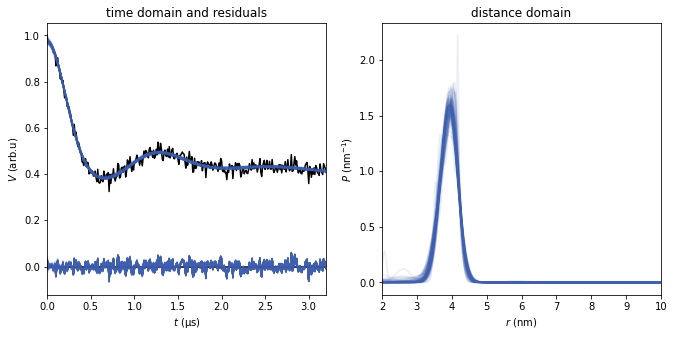

In [13]:
r = np.linspace(2, 10,num = 300)
Ps, Vs, _, _ = dive.drawPosteriorSamples(df2,r,t)
dive.plotMCMC(Ps,Vs,Vdata,t,r)